# Transformacion de datos para el modelo

## Importando librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

## Informacion del dataset

- **trans_date_trans_time**: Fecha y hora de la transacción.
- **cc_num**: Número de la tarjeta de crédito utilizada.
- **merchant**: Nombre del comerciante donde se realizó la transacción.
- **category**: Categoría del comercio (por ejemplo, restaurante, supermercado, etc.).
- **amt**: Monto de la transacción.
- **first**: Primer nombre del titular de la tarjeta.
- **last**: Apellido del titular de la tarjeta.
- **gender**: Género del titular de la tarjeta.
- **street**: Dirección de residencia del titular de la tarjeta.
- **city**: Ciudad de residencia del titular de la tarjeta.
- **state**: Estado de residencia del titular de la tarjeta.
- **zip**: Código postal de la residencia del titular de la tarjeta.
- **lat**: Latitud de la residencia del titular de la tarjeta.
- **long**: Longitud de la residencia del titular de la tarjeta.
- **city_pop**: Población de la ciudad donde reside el titular de la tarjeta.
- **job**: Ocupación del titular de la tarjeta.
- **dob**: Fecha de nacimiento del titular de la tarjeta.
- **trans_num**: Número de identificación de la transacción.
- **unix_time**: Marca de tiempo en formato Unix para la transacción.
- **merch_lat**: Latitud del comerciante donde se realizó la transacción.
- **merch_long**: Longitud del comerciante donde se realizó la transacción.
- **is_fraud**: Indicador de si la transacción es fraudulenta (1) o no (0).

## Cargando Datos

In [2]:
data_train = pd.read_csv("../data/fraudTrain.csv")

In [3]:
data_train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [4]:
data_train.shape

(1296675, 23)

## Analisis de datos

### Informacion de tipos de datos

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### Numero de clases

In [6]:
data_train.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

### Valores nulos

In [7]:
data_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Numero de duplicados

In [8]:
data_train.duplicated().sum()

np.int64(0)

## Limpieza de datos

### Equilibracion de clases

In [9]:
rus = RandomUnderSampler(random_state=42)
X = data_train.drop("is_fraud",axis=1) # <-- es tu conjunto de características.
Y = data_train.is_fraud # <--- es tu conjunto de etiquetas o clases.

X_over, y_over = rus.fit_resample(X,Y)
y_over.unique()

data = pd.concat([X_over, y_over] , axis = 1)


In [10]:
data.shape

(15012, 23)

### Granulacion de la columna trans_date_trans_time	

In [11]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
811778,811778,2019-12-07 10:55:06,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,Brittany,Cox,F,07177 William Dale Apt. 547,...,34.0287,-118.4924,92043,"Civil engineer, contracting",1961-04-25,f32d1f4b2a918f4c2f6acdc83033ee35,1354877706,33.287851,-118.740970,0
1101718,1101718,2020-04-03 13:10:06,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,Tamara,Martinez,F,471 Marquez Prairie Suite 680,...,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,f5dad8e2d7c39d81502d846a20286659,1364994606,36.539950,-89.857416,0
800013,800013,2019-12-04 07:07:04,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,Tara,Richards,F,4879 Cristina Station,...,39.9636,-79.7853,184,Systems developer,1945-11-04,1d023bc78ab93ab65a35bbb53bcc67bd,1354604824,39.582872,-78.838550,0


In [12]:
data['date'] = data['trans_date_trans_time'].dt.date
data['time'] = data['trans_date_trans_time'].dt.time
data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time
811778,811778,2019-12-07 10:55:06,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,Brittany,Cox,F,07177 William Dale Apt. 547,...,92043,"Civil engineer, contracting",1961-04-25,f32d1f4b2a918f4c2f6acdc83033ee35,1354877706,33.287851,-118.740970,0,2019-12-07,10:55:06
1101718,1101718,2020-04-03 13:10:06,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,Tamara,Martinez,F,471 Marquez Prairie Suite 680,...,1019,Aeronautical engineer,1979-01-26,f5dad8e2d7c39d81502d846a20286659,1364994606,36.539950,-89.857416,0,2020-04-03,13:10:06
800013,800013,2019-12-04 07:07:04,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,Tara,Richards,F,4879 Cristina Station,...,184,Systems developer,1945-11-04,1d023bc78ab93ab65a35bbb53bcc67bd,1354604824,39.582872,-78.838550,0,2019-12-04,07:07:04


### Organizando columnas

In [13]:
columnas = ['date','time'] + [ col for col in data.columns if col not in ['date','time']]
data = data[columnas]
data.drop(columns=['trans_date_trans_time'], axis= 1 , inplace=True)

In [14]:
data.head(3)

,date,time,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
811778,2019-12-07,10:55:06,811778,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,Brittany,Cox,F,...,34.0287,-118.4924,92043,"Civil engineer, contracting",1961-04-25,f32d1f4b2a918f4c2f6acdc83033ee35,1354877706,33.287851,-118.740970,0
1101718,2020-04-03,13:10:06,1101718,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,Tamara,Martinez,F,...,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,f5dad8e2d7c39d81502d846a20286659,1364994606,36.539950,-89.857416,0
800013,2019-12-04,07:07:04,800013,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,Tara,Richards,F,...,39.9636,-79.7853,184,Systems developer,1945-11-04,1d023bc78ab93ab65a35bbb53bcc67bd,1354604824,39.582872,-78.838550,0


### Tranformando columna de numero de tarjeta a numero de veces usada

In [15]:
card_transaction_counts = data['cc_num'].value_counts()
data['card_transaction_count'] = data['cc_num'].map(card_transaction_counts)
data.drop(columns=['cc_num'] , axis = 1 , inplace=True)

In [16]:
data.head(3)

,date,time,Unnamed: 0,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,card_transaction_count
811778,2019-12-07,10:55:06,811778,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,Brittany,Cox,F,07177 William Dale Apt. 547,...,-118.4924,92043,"Civil engineer, contracting",1961-04-25,f32d1f4b2a918f4c2f6acdc83033ee35,1354877706,33.287851,-118.740970,0,14
1101718,2020-04-03,13:10:06,1101718,fraud_Lind-Buckridge,entertainment,85.81,Tamara,Martinez,F,471 Marquez Prairie Suite 680,...,-89.6287,1019,Aeronautical engineer,1979-01-26,f5dad8e2d7c39d81502d846a20286659,1364994606,36.539950,-89.857416,0,24
800013,2019-12-04,07:07:04,800013,fraud_Hackett-Lueilwitz,grocery_pos,99.30,Tara,Richards,F,4879 Cristina Station,...,-79.7853,184,Systems developer,1945-11-04,1d023bc78ab93ab65a35bbb53bcc67bd,1354604824,39.582872,-78.838550,0,9


### Analizando colmunas numericas

In [17]:
data_numeric = data.select_dtypes(include=np.number)

In [18]:
data_numeric

,Unnamed: 0,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,card_transaction_count
811778,811778,86.19,90403,34.0287,-118.4924,92043,1354877706,33.287851,-118.740970,0,14
1101718,1101718,85.81,63867,36.7154,-89.6287,1019,1364994606,36.539950,-89.857416,0,24
800013,800013,99.30,15449,39.9636,-79.7853,184,1354604824,39.582872,-78.838550,0,9
398945,398945,42.09,59448,48.2777,-112.8456,743,1341081788,48.310513,-112.837535,0,26
207455,207455,4.24,37663,36.4715,-82.4834,87124,1334519869,37.329094,-82.070746,0,10
...,...,...,...,...,...,...,...,...,...,...,...
1295399,1295399,977.01,32960,27.6330,-80.4031,105638,1371776408,26.888686,-80.834389,1,12
1295491,1295491,1210.91,32960,27.6330,-80.4031,105638,1371779615,28.216707,-79.855648,1,12
1295532,1295532,10.24,70726,30.4590,-90.9027,71335,1371781016,29.700456,-91.361632,1,23
1295666,1295666,21.69,79759,31.8599,-102.7413,23,1371785180,32.675272,-103.484949,1,12


In [19]:
data_numeric.corr()['is_fraud'].sort_values(ascending=True)

card_transaction_count   -0.051759
unix_time                -0.032213
Unnamed: 0               -0.029827
zip                      -0.025534
merch_lat                 0.008015
lat                       0.008472
city_pop                  0.022290
merch_long                0.025498
long                      0.025504
amt                       0.619952
is_fraud                  1.000000
Name: is_fraud, dtype: float64

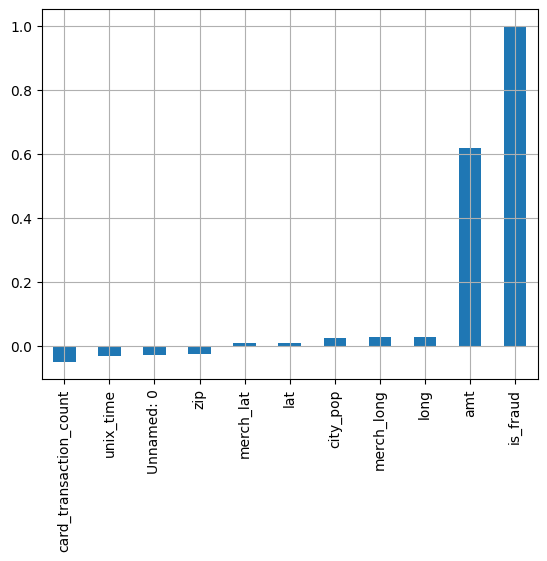

In [20]:
data_numeric.corr()['is_fraud'].sort_values(ascending=True).plot(kind='bar')
plt.grid()

### Eliminacion de columnas innecesarias 

In [21]:
data.drop(columns=["Unnamed: 0", 'first','last','street','trans_num','city','state','merchant','job'], inplace=True)

### Ordenando columnas

In [22]:
columnas = ['card_transaction_count'] + [ col for col in data.columns if col not in ['card_transaction_count']]
data = data[columnas]
data.head(3)

,card_transaction_count,date,time,category,amt,gender,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
811778,14,2019-12-07,10:55:06,gas_transport,86.19,F,90403,34.0287,-118.4924,92043,1961-04-25,1354877706,33.287851,-118.740970,0
1101718,24,2020-04-03,13:10:06,entertainment,85.81,F,63867,36.7154,-89.6287,1019,1979-01-26,1364994606,36.539950,-89.857416,0
800013,9,2019-12-04,07:07:04,grocery_pos,99.30,F,15449,39.9636,-79.7853,184,1945-11-04,1354604824,39.582872,-78.838550,0


### Derivando columnas date y time

In [23]:
data['date'] = pd.to_datetime(data['date'] , format='%Y-%m-%d')
data['time'] = pd.to_datetime(data['time'] , format ='%H:%M:%S')

data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['hour'] = data['time'].dt.hour

In [24]:
data.drop(columns=['date' , 'time'] , inplace=True)

In [25]:
data.head(5)

,card_transaction_count,category,amt,gender,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,year,day,month,hour
811778,14,gas_transport,86.19,F,90403,34.0287,-118.4924,92043,1961-04-25,1354877706,33.287851,-118.740970,0,2019,7,12,10
1101718,24,entertainment,85.81,F,63867,36.7154,-89.6287,1019,1979-01-26,1364994606,36.539950,-89.857416,0,2020,3,4,13
800013,9,grocery_pos,99.30,F,15449,39.9636,-79.7853,184,1945-11-04,1354604824,39.582872,-78.838550,0,2019,4,12,7
398945,26,home,42.09,F,59448,48.2777,-112.8456,743,1972-05-04,1341081788,48.310513,-112.837535,0,2019,30,6,18
207455,10,shopping_net,4.24,F,37663,36.4715,-82.4834,87124,1987-02-14,1334519869,37.329094,-82.070746,0,2019,15,4,19


### Transformando columna fecha_nacimiento(dob) a edad actual del titular(age)

In [26]:
data['dob'] = pd.to_datetime(data['dob'] , format='%Y-%m-%d')
data['year2'] = data['dob'].dt.year
data['age'] = data[['year2' , 'year']].apply(
    lambda x : x['year'] - x['year2'] , axis = 1
)

In [ ]:
data.drop(columns=['year2' ,'dob'] , inplace=True)
columnas = ['year' , 'month' ,'day', 'hour' , 'age'] + [ col for col in data.columns if col not in ['year' ,'month' ,'day', 'hour' , 'age']]
data = data[columnas]

In [31]:
data.head()

,year,month,day,hour,age,card_transaction_count,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
811778,2019,12,7,10,58,14,2.0,86.19,0.0,90403,34.0287,-118.4924,92043,1354877706,33.287851,-118.740970,0
1101718,2020,4,3,13,41,24,0.0,85.81,0.0,63867,36.7154,-89.6287,1019,1364994606,36.539950,-89.857416,0
800013,2019,12,4,7,74,9,4.0,99.30,0.0,15449,39.9636,-79.7853,184,1354604824,39.582872,-78.838550,0
398945,2019,6,30,18,47,26,6.0,42.09,0.0,59448,48.2777,-112.8456,743,1341081788,48.310513,-112.837535,0
207455,2019,4,15,19,32,10,11.0,4.24,0.0,37663,36.4715,-82.4834,87124,1334519869,37.329094,-82.070746,0


### Codificando a numero columnas categoricas

In [29]:
encoder = OrdinalEncoder()
data_categoric = data.select_dtypes(exclude = np.number)
data_become_numeric = encoder.fit_transform(data_categoric)
data[['category' , 'gender']] = data_become_numeric

### Analizando correlaciond e variables resultantes

month                    -0.078465
card_transaction_count   -0.051759
unix_time                -0.032213
zip                      -0.025534
merch_lat                 0.008015
lat                       0.008472
year                      0.017795
city_pop                  0.022290
day                       0.022678
merch_long                0.025498
long                      0.025504
gender                    0.048675
age                       0.069362
hour                      0.087807
category                  0.128425
amt                       0.619952
is_fraud                  1.000000
Name: is_fraud, dtype: float64


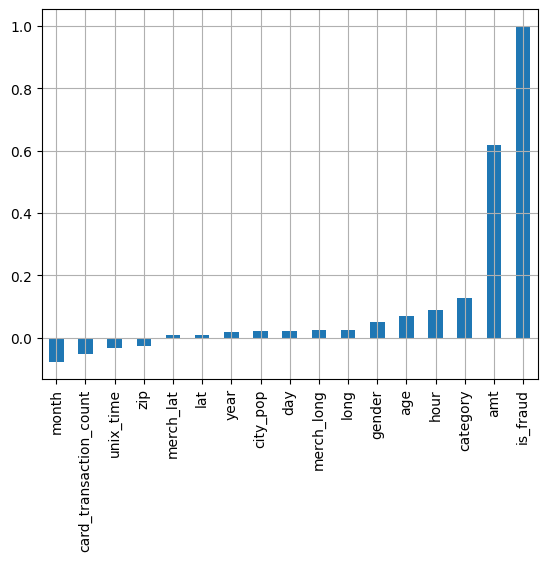

In [30]:
print(data.corr()['is_fraud'].sort_values(ascending=True))
data.corr()['is_fraud'].sort_values(ascending=True).plot(kind='bar')
plt.grid()

### Exportando los datos transformado para el modelo

In [32]:
data.to_csv('../data/data_tranform.csv' , index = False)